# Do the MNIST using CNN, very easy just add convolution and pooling layers 

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
print(f'x_train shape: {x_train.shape} \n')
print(f'x_test shape: {x_test.shape} \n')

x_train shape: (50000, 32, 32, 3) 

x_test shape: (10000, 32, 32, 3) 



In [3]:
#for verification
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

#reshape y_train to a 1D array to match the array above
y_train = y_train.reshape(-1, )
y_test = y_test.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
#Function to plot image
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

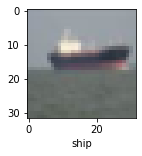

In [5]:
plot_sample(x_train, y_train, 69)

In [6]:
#Scaling both x_train and x_test by dividing by 255
x_train = x_train / 255
x_test = x_test / 255

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
cnn = tf.keras.models.Sequential([
    #CNN layer
        layers.Conv2D(filters = 32, kernel_size = (3,3), input_shape = (32,32,3), activation = 'relu'),
        layers.MaxPool2D(pool_size = (2,2)),
        layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
        layers.MaxPool2D(pool_size = (2,2)),
    
    #dense layer
        layers.Flatten(),
        layers.Dense(units = 64, activation = 'relu'),
        layers.Dense(units = 10, activation = 'softmax')
        ]
)

In [9]:
#if save_weights_only = False -> will save the whole model, including architecture
save_callback = tf.keras.callbacks.ModelCheckpoint(
    'model_checkpoints/cifar10',
    save_weights_only = True,
    monitor = 'accuracy',
    save_best_only = True
)

In [10]:
#Compile 
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) 

In [11]:
cnn.fit(x = x_train, y = y_train, epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4951 - accuracy: 0.4593
Epoch 2/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1702 - accuracy: 0.5868
Epoch 3/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0428 - accuracy: 0.6344
Epoch 4/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9709 - accuracy: 0.6626
Epoch 5/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9076 - accuracy: 0.6823
Epoch 6/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8631 - accuracy: 0.6986
Epoch 7/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8227 - accuracy: 0.7123
Epoch 8/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7880 - accuracy: 0.7233
Epoch 9/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7563 - accuracy: 0.7331
Epoch 10/15
1563/1563 [==============================] - 18s 12m

In [13]:
cnn.save('model_checkpoints/cifar10/')
#cnn.load_weights('model_checkpoints/cifar10/')

INFO:tensorflow:Assets written to: model_checkpoints/cifar10/assets


In [12]:
#Classification Report

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.77      0.82      0.79      1000
           2       0.52      0.63      0.57      1000
           3       0.46      0.59      0.52      1000
           4       0.66      0.58      0.62      1000
           5       0.71      0.44      0.54      1000
           6       0.75      0.77      0.76      1000
           7       0.74      0.74      0.74      1000
           8       0.81      0.77      0.79      1000
           9       0.78      0.75      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



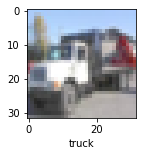

In [20]:
plot_sample(x_test, y_pred_classes, 45)